# Land Classifcaton Algorithms
An evaluation of land classification algorthims using various machine learning techniques. Comparing time and space efficiency, accuracy to known software results, and conducting statistical tests. 

## 1. Introduction
Background and gaps in knowledge


In [2]:
# Bring in required libraries
import numpy as np
import cv2
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
# Import gdal
from osgeo import gdal

## 2. Data and Methods
### 2.1 Data
The study area is the southern tip of Vancouver Island which includes the city of Victoria and the Saanich Penninsula (Fig. 1). It was chosen because it has a heterogenous landscape and very little snow cover. 
- Take more info from the proposal description and literature 

The data came from the European Space Agency and was collected using the Sentinel 2A mission delivered as a level 1C product.
- talk about the type of sensor what it is commonly used for and why it was chosen 


Table 1: Sentinel 2A Spectral Bands and Resolution where NIR is near infrared, MIR is mid infrared, VNIR is vegetation near infrared (red edge spectral domain), and SWIR is short wave infrared.

|Band Number|Type  |Central Wavelength (nm)|Bandwidth (nm)|Resolution (m)|
|-----------|------|-----------------------|--------------|--------------|
|   1       |Violet| 442.7                 | 27           | 60           |
|   2       |Blue  | 492.4                 | 98           | 10           |
|   3       |Green | 599.8                 | 45           | 10           |
|   4       |Red   | 664.6                 | 38           | 10           |
|   5       |VNIR  | 704.5                 | 19           | 20           |
|   6       |VNIR  | 740.5                 | 18           | 20           |
|   7       |VNIR  | 782.8                 | 28           | 20           |
|   8       |NIR   | 832.8                 | 145          | 10           |
|   8a      |VNIR  | 864.7                 | 33           | 20           |
|   9       |MIR   | 442.7                 | 27           | 60           |
|   10      |MIR   | 442.7                 | 27           | 60           |
|   11      |SWIR  | 1613.7                | 143          | 20           |
|   12      |SWIR  | 2202.4                | 242          | 20           |


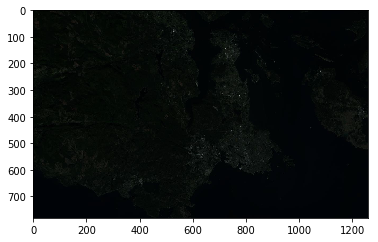

In [20]:
#load and display the data

# Set paths to GeoTiff and figures
tif_path = 'C:\\Users\\Andrea\\Documents\\UVIC\\ResearchProject\\Working\\GeoTiffs\\'
fig_path = 'C:\\Users\\Andrea\\Documents\\UVIC\\ResearchProject\\Working\\Figures\\'

# Open GeoTiff file
dataset = gdal.Open(tif_path+'S2A_0928_subset_bilinear_AC_spec.tif', gdal.GA_ReadOnly)

# Display RGB image with bands 4,3,2 respectively
options_list = ['-ot Byte','-of JPEG', '-b 2', '-b 3', '-b 4', '-scale'] 
options_string = " ".join(options_list)

gdal.Translate(tif_path+'study_area.jpg', tif_path+'S2A_0928_subset_bilinear_AC_spec.tif', options=options_string)
img = cv2.imread(tif_path+'study_area.jpg')
plt.imshow(img)

# Display study area with enhancement
# !!! TODO

The training data include 7 classes: [1. 2. 3. 4. 5. 6. 7.]
Class ID 1: Urban
Class ID 2: Forest
Class ID 3: Shrub
Class ID 4: Agriculture
Class ID 5: Grassland
Class ID 6: Wetland
Class ID 7: Water


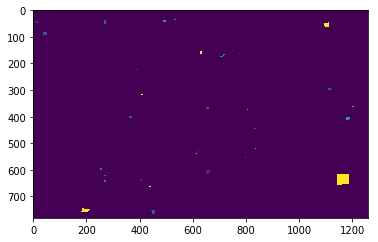

In [22]:
# Bring in the training data
# Note: bands 1 and 2 are reverse ordered due to export of tif in SNAP
#       Order of bands: labels, b2, b1, b3, b4, b5, ..., b10
train = gdal.Open(tif_path+"S2A_0928_training_set.tif", gdal.GA_ReadOnly)
S2_train = np.zeros((1,1,1))
for y in range(1, train.RasterCount + 1):
    t_band = train.GetRasterBand(y)
    t_array = t_band.ReadAsArray()
    if y <= 1:
        S2_train = np.array(t_array)
    else:
        S2_train = np.dstack((S2_train, np.array(t_array)))

# Extract classification labels from training data
#may only need the first band because can extract pixels from other bands for the training sites?
#!!!CHANGE COLOURS AND SIZE
sites = S2_train[:,:,0]
labels_ID = np.unique(sites[sites>0])
print('The training data include %d classes: %s'%(labels_ID.size, labels_ID))

# Create dictionary for each class
class_labels = {1:'Urban',2:'Forest',3:'Shrub',4:'Agriculture',5:'Grassland',6:'Wetland',7:'Water'}
for i in labels_ID:
    print('Class ID %d: %s'%(i,class_labels[i]))

# Display training sites
plt.imshow(sites)

### 2.2 Classification Methods
#### 2.2.1 Process data and create base classification for comparison
The data was delivered as a level 1C product which means that system processing has been completed. The dataset contains top of the atmosphere returns which require an atmospheric correction. 
- Explain what an atmospheric correction is and why it is required

Prior to preforming a land classificaton the data was resampled to 10m using bilinear resampling, then a subset was chosen for the study area.

- Explain the PCI software and why it will be used as the base case classification model, how it works, etc.


#### 2.2.2 Recreate Maximum Likelihood Classification


#### 2.2.3 Try SVM


#### 2.2.4 Try Neural Network


#### 2.2.5 Time and Space Efficiency


#### 2.2.6 Accuracy Assessment 


#### 2.2.7 Statistical Comparison to base

## 3. Results
### 3.1 Descriptive Statistics
Descriptive statistics for each spectral band from the dataset 

In [23]:
# Save each band from dataset in a 3D array
S2_array = np.zeros((1,1,1))
print('Descriptive statistics for each band')
for x in range(1, dataset.RasterCount + 1):
    band = dataset.GetRasterBand(x)
    array = band.ReadAsArray()
    if x <= 1:
        S2_array = np.array(array)
    else:
        S2_array = np.dstack((S2_array, np.array(array)))
   
    # Print statistics for each band
    stats = band.GetStatistics(True,True)
    print("Band #%d: Minimum=%.3f, Maximum=%.3f, Mean=%.3f, Standard Deviation=%.3f"%(x,stats[0],stats[1],
                                                                                      stats[2],stats[3]))
    
print('Shape of Dataset')
print(S2_array.shape)
print('Number of bands')
print(dataset.RasterCount)
print('\n')

Descriptive statistics for each band
Band #1: Minimum=859.000, Maximum=6622.000, Mean=1156.299, Standard Deviation=81.195
Band #2: Minimum=658.000, Maximum=6641.000, Mean=830.384, Standard Deviation=107.047
Band #3: Minimum=396.000, Maximum=6546.000, Mean=602.022, Standard Deviation=153.966
Band #4: Minimum=199.000, Maximum=9330.000, Mean=369.824, Standard Deviation=195.252
Band #5: Minimum=52.000, Maximum=14977.000, Mean=499.505, Standard Deviation=309.424
Band #6: Minimum=1.000, Maximum=12489.000, Mean=1041.274, Standard Deviation=815.650
Band #7: Minimum=39.000, Maximum=17863.000, Mean=1249.514, Standard Deviation=1035.544
Band #8: Minimum=1.000, Maximum=16966.000, Mean=1375.465, Standard Deviation=1191.166
Band #9: Minimum=1.000, Maximum=3476.000, Mean=325.503, Standard Deviation=261.559
Band #10: Minimum=1.000, Maximum=13106.000, Mean=621.467, Standard Deviation=675.104
Band #11: Minimum=1.000, Maximum=18816.000, Mean=295.308, Standard Deviation=382.107
Shape of Dataset
(781, 1259

### 3.2 PCI Software Output
This section needs to be redone after updating the preprocessing of the data

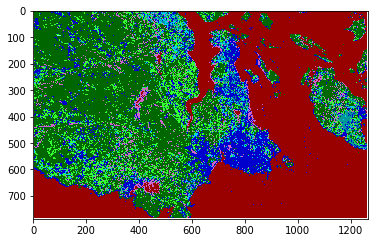

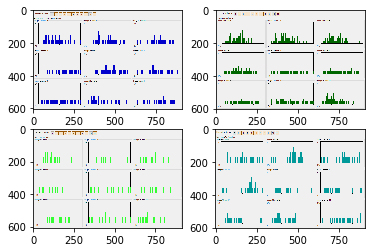

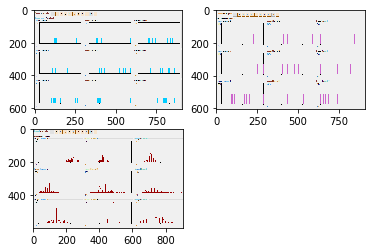

In [24]:
# maximum likelihood classifier created by PCI software
#!!! I HAVE TO REDO THIS WHOLE THING
'''
pci_class = gdal.Open(tif_path+'S2A_0928_maxClass.tif',gdal.GA_ReadOnly)
pci_class_array = np.zeros((1,1,1))
for n in range(1, pci_class.RasterCount + 1):
    pci_band = pci_class.GetRasterBand(x)
    pci_array = pci_band.ReadAsArray()
    if x <= 1:
        pci_class_array = np.array(pci_array)
    else:
        pci_class_array = np.dstack((pci_class_array, np.array(pci_array)))

pci_img = pci_class_array[:,:,0]
plt.imshow(pci_img)
'''

# Display figures until fix the GeoTiff resolution
# !!! NEED TO FIX SIZES

# Figure of classificaiton
plt.figure(1)
pci_img1 = cv2.imread(fig_path+'pci_max_class.png')
plt.imshow(pci_img1)

# Figure of histograms for training sites
plt.figure(2)
plt.subplot(221)
urban_hist = cv2.imread(fig_path+'urban_barren_hist.png')
plt.imshow(urban_hist)

plt.subplot(222)
forest_hist = cv2.imread(fig_path+'forest_hist.png')
plt.imshow(forest_hist)

plt.subplot(223)
shrub_hist = cv2.imread(fig_path+'shrub_hist.png')
plt.imshow(shrub_hist)

plt.subplot(224)
agriculture_hist = cv2.imread(fig_path+'agriculture_hist.png')
plt.imshow(agriculture_hist)

plt.figure(3)
plt.subplot(221)
grassland_hist = cv2.imread(fig_path+'grassland_hist.png')
plt.imshow(grassland_hist)

plt.subplot(222)
wetland_hist = cv2.imread(fig_path+'wetland_hist.png')
plt.imshow(wetland_hist)

plt.subplot(223)
water_hist = cv2.imread(fig_path+'water_hist.png')
plt.imshow(water_hist)


## 4. Discussion


## 5. References